* * * * *
Метод Штрассена
=================
* * * * *

#### Алгоритм Штрассена предназначен для быстрого умножения матриц. Он был разработан Фолькером Штрассеном в 1969 году и является обобщением метода умножения Карацубы на матрицы, который требует не 8 умножений, а 7.  ####
 
#### Для начала мы разбиваем каждую из исходных матриц на 4 равные части ####



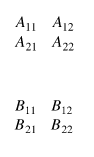

#### Далее мы находим коэфиценты d1, d2, d3, d4, d5, d6, d7 ####

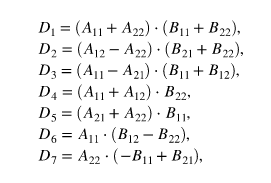

#### И с помощью несложных алгебраических вычислений находим матрицы с11, с12, с21, с22 ####

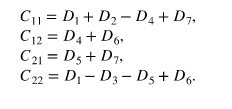

#### Решением является матрица С, которая выглядит следующим образом ####
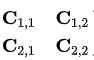

Подробнее с данным алгоритмом вы можете ознакомиться [здесь](https://ru.wikipedia.org/wiki/Алгоритм_Штрассена)
* * * * *

In [1]:
import numpy as np
import random 
import time
import matplotlib.pyplot as plt

* * * * *
#### Напишем функцию, которая будет задавать случайные значения матриц в диапозоне от 1 до 10. 
Функция будет принимать на вход два параметра: матрицу и ее размер для удобства сравнения времени выполнения функций.
* * * * *

In [2]:
def create_mat(mat,size):
    for i in range (size):
        for j in range (size):
            mat[i][j] = random.randint(0, 10)
    return mat

* * * * *
#### Ниже представленна функция, реализующая Метод Штрассена
Функция принимает на вход три аргумента: матрицу 1, матрицу 2 
* * * * *

In [3]:
def strassen (mat1,mat2):
    size=len(mat1)
    if (size<=64):
        return (mat1*mat2)
    else:
        
        size_mat=int(size/2)
        
    #Разбиваем матрицу на 4 части
        s1 = np.hsplit(np.vsplit(mat1, 2)[0], 2)
        s2 = np.hsplit(np.vsplit(mat1, 2)[1], 2)
        a11 = s1[0]
        a12 = s1[1]
        a21 = s2[0]
        a22 = s2[1]
    
        s1 = np.hsplit(np.vsplit(mat2, 2)[0], 2)
        s2 = np.hsplit(np.vsplit(mat2, 2)[1], 2)
        b11 = s1[0]
        b12 = s1[1]
        b21 = s2[0]
        b22 = s2[1]
            
    #Находим коэффиценты d
        d1=strassen((a11+a22),(b11+b22))
        d2=strassen((a12-a22),(b21+b22))
        d3=strassen((a11-a21),(b11+b12))
        d4=strassen((a11+a12),(b22))
        d5=strassen((a21+a22),(b11))
        d6=strassen((a11),(b12-b22))
        d7=strassen((a22),(b21-b11))

    #Находим коэффиценты с  
        c11=d1+d2-d4+d7
        c12=d4+d6
        c21=d5+d7
        c22=d1-d3-d5+d6
        
        rez=np.vstack([np.hstack([c11, c12]), np.hstack([c21, c22])])
        
        return(rez)

* * * * *
#### Чтобы запустить функцию, нужно ввести число k, которое отвечает за размер матрицы. По условию задачи размер матрицы $2^k$
* * * * *

In [4]:
print('Размер матрицы 2^k.')
print('Введите k')
k=int(input())
size=pow(2,k) #Размер матрицы

mat1=np.zeros((size,size))
mat2=np.zeros((size,size))
mat1=create_mat(mat1,size) #Заполняем рандомными числами матрицы
mat2=create_mat(mat2,size)
    
print('mat1')
print(mat1)
print()
print('mat2')
print(mat2)
print()
print('MultyMatrix')
print(strassen(mat1,mat2))

Размер матрицы 2^k.
Введите k
7
mat1
[[2. 5. 8. ... 2. 4. 2.]
 [2. 1. 8. ... 0. 4. 1.]
 [6. 4. 2. ... 1. 1. 1.]
 ...
 [6. 1. 7. ... 7. 2. 8.]
 [9. 8. 4. ... 4. 3. 2.]
 [9. 4. 9. ... 8. 4. 1.]]

mat2
[[ 9.  7.  9. ...  3.  3. 10.]
 [ 1.  6.  3. ...  0.  9.  3.]
 [ 4.  5.  2. ...  5.  6.  5.]
 ...
 [ 9.  7.  4. ...  7. 10.  4.]
 [ 2.  4. 10. ...  4.  2. 10.]
 [10.  5.  4. ...  7. 10.  5.]]

MultyMatrix
[[ 72.  43.  75. ...  21.  70.   2.]
 [  2.  36.  96. ...   0.  18.  26.]
 [124.  28.  14. ...  28.  23.  10.]
 ...
 [117.  13.  74. ...  89.  38.  41.]
 [ 28.  48.  36. ...  34.  24. 100.]
 [ 82.  32.  78. ...  66.  58.  86.]]


* * * * *
#### На выходе показываются три матрицы.
#### Две изначальные (mat1 и mat2)
#### И матрица результата умножения (Multymatrix)
#### mat1 * mat2 = MultyMatrix.


* * * * *
#### Посчитаем и сравним время выполнения алгоритма двумя разными способами. Обычным умножением и Методом Штрассена, соответсвенно.

In [5]:
mat1=create_mat(mat1,size)
mat2=create_mat(mat2,size)

x=[0,0,0,0]                #время выполнения обычного умножения
t=[0,0,0,0]                #время выполнения умножения методом штрассена
n=[16,32,64,128]           #соответствующие размеры матриц


size = n[0]
i=0
while size < n[3]+1:
    mat1=np.zeros((size,size))
    mat2=np.zeros((size,size))
    mat1=create_mat(mat1,size)
    mat2=create_mat(mat2,size)
    startTime = time.time()
    strassen(mat1,mat2)
    endTime = time.time()
    t[i]=endTime - startTime 
    startTime = time.time() 
    np.matmul(mat1,mat2)
    endTime = time.time()
    x[i]=endTime - startTime 
    size = size*2
    i=i+1
 

print(x)
print(t)

[8.630752563476562e-05, 0.0001876354217529297, 8.654594421386719e-05, 0.002579212188720703]
[1.8358230590820312e-05, 3.2901763916015625e-05, 3.2901763916015625e-05, 0.0005936622619628906]


* * * * *
#### Посмотрим на зависимость времени от порядка матриц на графике.
#### Первый график метод обычного умножения, второй метод умножения Штрассена.
* * * * *

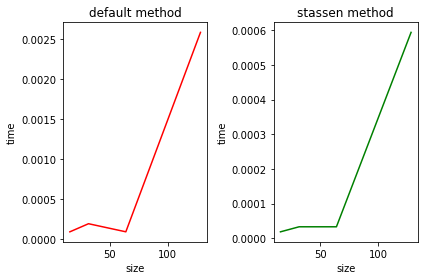

In [6]:
#нарисуем график обычного умножения
plt.subplot(1, 2, 1)
plt.plot(n, x, 'r')
plt.xlabel("size")
plt.ylabel("time")
plt.title("default method")

#нарисуем график метода штрассена
plt.subplot(1, 2, 2)
plt.plot(n, t, 'g')
plt.xlabel("size")
plt.ylabel("time")
plt.title("stassen method")

plt.tight_layout()

#### Мы видим, что алгоритм Штрассена работает в разы быстрее, по сравнению с обычным умножением матриц. Скорость такого метода равна $O(n^{log_2 7})$, что примерно равно  $O(n^{2.81})$.  Обычный алгоритм умножения матриц тратит  $O(n^{log_2 8})$ , что равно соотвественно   $O(n^{3})$
